In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import EfficientNetB7
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks (1)/Dataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks (1)/Dataset/Test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

efficientnet = EfficientNetB7(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



258076736/258076736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in efficientnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks (1)/Dataset/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(efficientnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=efficientnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3786 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 579 images belonging to 13 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
119/119 [==============================] - 1784s 15s/step - loss: 48.9395 - accuracy: 0.2232 - val_loss: 57.6130 - val_accuracy: 0.0864
Epoch 2/20
119/119 [==============================] - 505s 4s/step - loss: 35.1156 - accuracy: 0.2269 - val_loss: 70.9805 - val_accuracy: 0.0104
Epoch 3/20
119/119 [==============================] - 510s 4s/step - loss: 31.8038 - accuracy: 0.2237 - val_loss: 63.3846 - val_accuracy: 0.0138
Epoch 4/20
119/119 [==============================] - 514s 4s/step - loss: 33.1364 - accuracy: 0.2377 - val_loss: 56.7673 - val_accuracy: 0.0864
Epoch 5/20
119/119 [==============================] - 518s 4s/step - loss: 35.4444 - accuracy: 0.2221 - val_loss: 72.9715 - val_accuracy: 0.0104
Epoch 6/20
119/119 [==============================] - 509s 4s/step - loss: 31.0930 - accuracy: 0.2356 - val_loss: 61.7487 - val_accuracy: 0.0864
Epoch 7/20
119/119 [==============================] - 514s 4s/step - loss: 33.7086 - accuracy: 0.2316 - val_loss: 75.9332 - val_

In [ ]:
import matplotlib.pyplot as plt

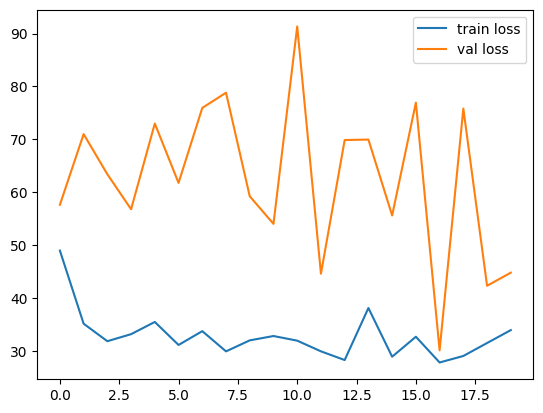

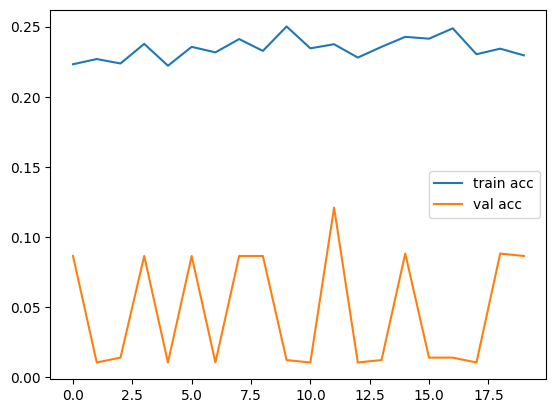

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks (1)/model_EfficientNetB7.h5')

In [ ]:
y_pred = model.predict(test_set)

19/19 [==============================] - 90s 4s/step


In [ ]:
y_pred

array([[8.2236477e-17, 4.6942688e-07, 9.7086160e-03, ..., 3.9024086e-27,
        0.0000000e+00, 4.5977673e-38],
       [7.3129483e-17, 3.9458726e-07, 7.1983598e-03, ..., 3.6688954e-27,
        0.0000000e+00, 4.8814854e-38],
       [7.3652109e-17, 3.7767259e-07, 8.0064554e-03, ..., 3.0825838e-27,
        0.0000000e+00, 3.4070305e-38],
       ...,
       [7.8546497e-17, 4.3131857e-07, 1.1620288e-02, ..., 4.1648416e-27,
        0.0000000e+00, 4.0803236e-38],
       [7.9113334e-17, 5.3086501e-07, 2.2479238e-02, ..., 4.9415911e-27,
        0.0000000e+00, 3.3963223e-38],
       [7.7376314e-17, 5.4336323e-07, 2.9830653e-02, ..., 5.0273085e-27,
        0.0000000e+00, 3.0702438e-38]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/Colab Notebooks (1)/model_EfficientNetB7.h5')

In [ ]:
#img_data

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks (1)/Dataset/Test/Black Root Rot/10blackroot rot.PNG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[169., 171., 171.],
        [169., 171., 171.],
        [171., 173., 172.],
        ...,
        [220., 227., 223.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[169., 171., 171.],
        [169., 171., 171.],
        [171., 173., 172.],
        ...,
        [220., 227., 223.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[167., 168., 168.],
        [167., 168., 168.],
        [169., 172., 171.],
        ...,
        [218., 223., 218.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 4s 4s/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 53ms/step


In [ ]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks (1)/model_EfficientNetB7.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/content/drive/MyDrive/Colab Notebooks (1)/Trained/Carrot_Dieseas/converted_effi_model.tflite", "wb").write(tflite_model)

238006476